## Data Mount

In [0]:
display(dbutils.fs.ls('/mnt/raw'))

path name size modificationTime dbfs:/mnt/raw/yellow_tripdata_2015-01.csv yellow_tripdata_2015-01.csv 1985964692 1725326471000 dbfs:/mnt/raw/yellow_tripdata_2016-01.csv yellow_tripdata_2016-01.csv 1708674492 1725291215000 dbfs:/mnt/raw/yellow_tripdata_2016-02.csv yellow_tripdata_2016-02.csv 1783554554 1725291226000 dbfs:/mnt/raw/yellow_tripdata_2016-03.csv yellow_tripdata_2016-03.csv 1914669757 1725291239000

## Import Data

In [0]:
from pyspark.sql.types import *

In [0]:
# Read data without specifying schema to infer data types
dfNYCTaxiData = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/raw/*.csv')

# Display data types inferred by Spark
dfNYCTaxiData.printSchema()

# Cast columns to desired types after handling NULLs or incorrect values
dfNYCTaxiData = dfNYCTaxiData \
    .withColumn("RatecodeID", dfNYCTaxiData["RatecodeID"].cast(IntegerType())) \
    .withColumn("payment_type", dfNYCTaxiData["payment_type"].cast(IntegerType()))


root
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)
 |-- RateCodeID: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- dropoff_longitude: string (nullable = true)
 |-- dropoff_latitude: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- extra: string (nullable = true)
 |-- mta_tax: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- improvement_surcharge: string (nullable = true)
 |-- total_amount: string (nullable = true)



In [0]:
dfNYCTaxiData = dfNYCTaxiData \
    .withColumn("tpep_pickup_datetime", dfNYCTaxiData["tpep_pickup_datetime"].cast(DateType())) \
    .withColumn("tpep_dropoff_datetime", dfNYCTaxiData["tpep_dropoff_datetime"].cast(DateType()))

In [0]:
# dfNYCTaxiData.cache()

DataFrame[VendorID: string, tpep_pickup_datetime: date, tpep_dropoff_datetime: date, passenger_count: string, trip_distance: string, pickup_longitude: string, pickup_latitude: string, RatecodeID: int, store_and_fwd_flag: string, dropoff_longitude: string, dropoff_latitude: string, payment_type: int, fare_amount: string, extra: string, mta_tax: string, tip_amount: string, tolls_amount: string, improvement_surcharge: string, total_amount: string]

In [0]:
display(dfNYCTaxiData)

VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count trip_distance pickup_longitude pickup_latitude RatecodeID store_and_fwd_flag dropoff_longitude dropoff_latitude payment_type fare_amount extra mta_tax tip_amount tolls_amount improvement_surcharge total_amount 2 2015-01-15 2015-01-15 1 1.59 -73.993896484375 40.750110626220703 1 N -73.974784851074219 40.750617980957031 1 12 1 0.5 3.25 0 0.3 17.05 1 2015-01-10 2015-01-10 1 3.30 -74.00164794921875 40.7242431640625 1 N -73.994415283203125 40.759109497070313 1 14.5 0.5 0.5 2 0 0.3 17.8 1 2015-01-10 2015-01-10 1 1.80 -73.963340759277344 40.802787780761719 1 N -73.951820373535156 40.824413299560547 2 9.5 0.5 0.5 0 0 0.3 10.8 1 2015-01-10 2015-01-10 1 .50 -74.009086608886719 40.713817596435547 1 N -74.004325866699219 40.719985961914063 2 3.5 0.5 0.5 0 0 0.3 4.8 1 2015-01-10 2015-01-10 1 3.00 -73.971176147460938 40.762428283691406 1 N -74.004180908203125 40.742652893066406 2 15 0.5 0.5 0 0 0.3 16.3 1 2015-01-10 2015-01-10 1 9.00 -73.874374389648438 40.7740478515625 1 N -73.986976623535156 40.758193969726563 1 27 0.5 0.5 6.7 5.33 0.3 40.33 1 2015-01-10 2015-01-10 1 2.20 -73.9832763671875 40.726009368896484 1 N -73.992469787597656 40.7496337890625 2 14 0.5 0.5 0 0 0.3 15.3 1 2015-01-10 2015-01-10 3 .80 -74.002662658691406 40.734142303466797 1 N -73.995010375976563 40.726325988769531 1 7 0.5 0.5 1.66 0 0.3 9.96 1 2015-01-10 2015-01-10 3 18.20 -73.783042907714844 40.644355773925781 2 N -73.987594604492187 40.759357452392578 2 52 0 0.5 0 5.33 0.3 58.13 1 2015-01-10 2015-01-10 2 .90 -73.985588073730469 40.767948150634766 1 N -73.985916137695313 40.759365081787109 1 6.5 0.5 0.5 1.55 0 0.3 9.35 1 2015-01-10 2015-01-10 1 .90 -73.988616943359375 40.723102569580078 1 N -74.00439453125 40.728584289550781 1 7 0.5 0.5 1.66 0 0.3 9.96 1 2015-01-10 2015-01-10 1 1.10 -73.993782043457031 40.751419067382812 1 N -73.9674072265625 40.757217407226563 1 7.5 0.5 0.5 1 0 0.3 9.8 1 2015-01-10 2015-01-10 1 .30 -74.00836181640625 40.704376220703125 1 N -74.009773254394531 40.707725524902344 2 3 0.5 0.5 0 0 0.3 4.3 1 2015-01-10 2015-01-10 1 3.10 -73.973945617675781 40.760448455810547 1 N -73.997344970703125 40.735210418701172 1 19 0.5 0.5 3 0 0.3 23.3 1 2015-01-10 2015-01-10 1 1.10 -74.006721496582031 40.731777191162109 1 N -73.995216369628906 40.739894866943359 2 6 0.5 0.5 0 0 0.3 7.3 2 2015-01-15 2015-01-15 1 2.38 -73.976425170898437 40.739810943603516 1 N -73.983978271484375 40.757888793945313 1 16.5 1 0.5 4.38 0 0.3 22.68 2 2015-01-15 2015-01-15 5 2.83 -73.968704223632812 40.754245758056641 1 N -73.955123901367188 40.786857604980469 2 12.5 1 0.5 0 0 0.3 14.3 2 2015-01-15 2015-01-15 5 8.33 -73.863059997558594 40.769580841064453 1 N -73.952713012695312 40.785781860351563 1 26 1 0.5 8.08 5.33 0.3 41.21 2 2015-01-15 2015-01-15 1 2.37 -73.945541381835938 40.779422760009766 1 N -73.980850219726563 40.786083221435547 1 11.5 1 0.5 0 0 0.3 13.3 2 2015-01-15 2015-01-15 2 7.13 -73.874458312988281 40.774009704589844 1 N -73.952377319335938 40.718589782714844 1 21.5 1 0.5 4.5 0 0.3 27.8 2 2015-01-15 2015-01-15 1 3.60 -73.976600646972656 40.751895904541016 1 N -73.998924255371094 40.714595794677734 2 17.5 1 0.5 0 0 0.3 19.3 2 2015-01-15 2015-01-15 1 .89 -73.994956970214844 40.745079040527344 1 N -73.99993896484375 40.734649658203125 1 5.5 1 0.5 1.62 0 0.3 8.92 2 2015-01-15 2015-01-15 1 .96 -74.000938415527344 40.747062683105469 1 N -74.003562927246094 40.735511779785156 1 5.5 1 0.5 1.3 0 0.3 8.6 2 2015-01-15 2015-01-15 2 1.25 -74.002777099609375 40.717891693115234 1 N -74.007919311523438 40.704219818115234 1 6.5 1 0.5 1.5 0 0.3 9.8 2 2015-01-15 2015-01-15 5 2.11 -73.997459411621094 40.736362457275391 1 N -73.978172302246094 40.761856079101562 1 11.5 1 0.5 2.5 0 0.3 15.8 2 2015-01-15 2015-01-15 5 1.15 -73.952278137207031 40.823993682861328 1 N -73.953338623046875 40.811088562011719 1 7.5 1 0.5 1.7 0 0.3 11 2 2015-01-15 2015-01-15 1 1.53 -73.991127014160156 40.750080108642578 1 N -73.988609313964844 40.734889

In [0]:
from pyspark.sql import SparkSession
import time

# Initialize Spark session
spark = SparkSession.builder.appName("NYCTaxiDataPerformanceTest").getOrCreate()# Function to measure execution time for different partition numbers
def measure_performance(num_partitions):
    # Repartition the DataFrame
    dfRepartitioned = dfNYCTaxiData.repartition(num_partitions)
    
    # Start time
    start_time = time.time()
    
    # Perform a simple transformation and action (e.g., count number of records with passenger_count > 0)
    count = dfRepartitioned.filter(dfRepartitioned.passenger_count > 5).count()
    
    # End time
    end_time = time.time()
    
    # Execution time
    execution_time = end_time - start_time
    print(f"Number of Partitions: {num_partitions}, Execution Time: {execution_time:.2f} seconds, Count: {count}")

# Experiment with different numbers of partitions
partition_numbers = [4, 8, 16, 32, 64, 128]

for num_partitions in partition_numbers:
    measure_performance(num_partitions)


Number of Partitions: 4, Execution Time: 131.99 seconds, Count: 1607985
Number of Partitions: 8, Execution Time: 1.53 seconds, Count: 1607985
Number of Partitions: 16, Execution Time: 1.45 seconds, Count: 1607985
Number of Partitions: 32, Execution Time: 1.64 seconds, Count: 1607985
Number of Partitions: 64, Execution Time: 1.62 seconds, Count: 1607985
Number of Partitions: 128, Execution Time: 2.19 seconds, Count: 1607985


## Min Workers = 2 , Max Workers = 4
## Worker/Driver Type: Standard_DS3_v2 (14 GB Memory, 4 Cores)

In [0]:
from pyspark.sql import SparkSession
import time

# Initialize Spark session
spark = SparkSession.builder.appName("NYCTaxiDataPerformanceTest").getOrCreate()

# Load data into a DataFrame without caching
dfTaxi = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/raw/*.csv')

# Function to measure execution time for different partition numbers
def measure_performance(num_partitions):
    # Repartition the DataFrame
    dfRepartitioned = dfTaxi.repartition(num_partitions)
    
    # Start time
    start_time = time.time()
    
    # Perform a simple transformation and action (e.g., count number of records with passenger_count > 0)
    # count = dfRepartitioned.filter(dfRepartitioned.passenger_count > 5).count()
    count = dfRepartitioned.count()
    
    # End time
    end_time = time.time()
    
    # Execution time
    execution_time = end_time - start_time
    print(f"Number of Partitions: {num_partitions}, Execution Time: {execution_time:.2f} seconds, Count: {count}")
    
    # Unpersist the DataFrame to clear cache
    dfRepartitioned.unpersist()

# Experiment with different numbers of partitions
# partition_numbers = [4, 8, 16, 32, 64, 128]
# test from 1 to 72 partitions
partition_numbers = [i for i in range(1, 73)]
for num_partitions in partition_numbers:
    measure_performance(num_partitions)


Number of Partitions: 4, Execution Time: 56.43 seconds, Count: 1607985
Number of Partitions: 8, Execution Time: 28.40 seconds, Count: 1607985
Number of Partitions: 16, Execution Time: 21.27 seconds, Count: 1607985
Number of Partitions: 32, Execution Time: 20.97 seconds, Count: 1607985
Number of Partitions: 64, Execution Time: 20.95 seconds, Count: 1607985
Number of Partitions: 128, Execution Time: 21.41 seconds, Count: 1607985


In [0]:
from pyspark.sql import SparkSession
import time
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("NYCTaxiDataPerformanceTest").getOrCreate()

# Load data into a DataFrame without caching
dfTaxi = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/raw/*.csv')

# Initialize a list to store the results
results = []

# Function to measure execution time for different partition numbers
def measure_performance(num_partitions):
    # Repartition the DataFrame
    dfRepartitioned = dfTaxi.repartition(num_partitions)
    
    # Start time
    start_time = time.time()
    
    # Perform a simple transformation and action (e.g., count number of records with passenger_count > 0)
    count = dfRepartitioned.count()
    
    # End time
    end_time = time.time()
    
    # Execution time
    execution_time = end_time - start_time
    print(f"Number of Partitions: {num_partitions}, Execution Time: {execution_time:.2f} seconds, Count: {count}")
    results.append((num_partitions, execution_time, count))
    
    # Unpersist the DataFrame to clear cache
    dfRepartitioned.unpersist()

# Experiment with different numbers of partitions
partition_numbers = [i for i in range(1, 73)]
for num_partitions in partition_numbers:
    measure_performance(num_partitions)


Number of Partitions: 1, Execution Time: 40.13 seconds, Count: 47248845
Number of Partitions: 2, Execution Time: 40.21 seconds, Count: 47248845
Number of Partitions: 3, Execution Time: 36.71 seconds, Count: 47248845
Number of Partitions: 4, Execution Time: 37.07 seconds, Count: 47248845
Number of Partitions: 5, Execution Time: 35.96 seconds, Count: 47248845
Number of Partitions: 6, Execution Time: 41.17 seconds, Count: 47248845
Number of Partitions: 7, Execution Time: 18.31 seconds, Count: 47248845
Number of Partitions: 8, Execution Time: 17.83 seconds, Count: 47248845
Number of Partitions: 9, Execution Time: 17.76 seconds, Count: 47248845
Number of Partitions: 10, Execution Time: 17.35 seconds, Count: 47248845
Number of Partitions: 11, Execution Time: 18.13 seconds, Count: 47248845
Number of Partitions: 12, Execution Time: 17.58 seconds, Count: 47248845
Number of Partitions: 13, Execution Time: 18.10 seconds, Count: 47248845
Number of Partitions: 14, Execution Time: 17.68 seconds, Cou

---------------------------------------------------------------------------
OSError                                   Traceback (most recent call last)
File <command-2656821941556677>, line 45
     42 results_df = pd.DataFrame(results, columns=['Number_of_Partitions', 'Execution_Time_seconds', 'Count'])
     44 # Save the results to a CSV file
---> 45 results_df.to_csv('/mnt/exectime/partition_performance.csv', index=False)
     47 print("Performance results saved to /mnt/exectime/partition_performance.csv")

File /databricks/python/lib/python3.10/site-packages/pandas/util/_decorators.py:211, in deprecate_kwarg.<locals>._deprecate_kwarg.<locals>.wrapper(*args, **kwargs)
    209     else:
    210         kwargs[new_arg_name] = new_arg_value
--> 211 return func(*args, **kwargs)

File /databricks/python/lib/python3.10/site-packages/pandas/core/generic.py:3720, in NDFrame.to_csv(self, path_or_buf, sep, na_rep, float_format, columns, header, index, index_label, mode, encoding, compression, 

In [0]:
display(results_df)
# Convert results to a Spark DataFrame
results_df = spark.createDataFrame(results, schema=['Number_of_Partitions', 'Execution_Time_seconds', 'Count'])

# Coalesce to a single partition and save to a single CSV file
results_df.coalesce(1).write.format("csv").mode("overwrite").option("header", "true").save("/mnt/exectime/partition_performance.csv")

Number_of_Partitions Execution_Time_seconds Count 1 40.125826358795166 47248845 2 40.21375036239624 47248845 3 36.70946478843689 47248845 4 37.0727322101593 47248845 5 35.959280490875244 47248845 6 41.16797065734863 47248845 7 18.30535864830017 47248845 8 17.8317232131958 47248845 9 17.76488208770752 47248845 10 17.349374294281006 47248845 11 18.132410287857056 47248845 12 17.58048963546753 47248845 13 18.098134756088257 47248845 14 17.675279140472412 47248845 15 17.55763530731201 47248845 16 17.627313375473022 47248845 17 17.777100324630737 47248845 18 17.764472723007202 47248845 19 17.354729413986206 47248845 20 17.798285961151123 47248845 21 18.03036642074585 47248845 22 17.99624800682068 47248845 23 17.80126452445984 47248845 24 17.5572247505188 47248845 25 17.417607307434082 47248845 26 17.519096851348877 47248845 27 17.578086137771606 47248845 28 18.00312066078186 47248845 29 17.74617099761963 47248845 30 17.521440029144287 47248845 31 18.26904797554016 47248845 32 17.33240294456482 47248845 33 17.444708347320557 47248845 34 17.98095440864563 47248845 35 17.61057996749878 47248845 36 17.775127410888672 47248845 37 18.00053834915161 47248845 38 17.452852725982666 47248845 39 17.505176067352295 47248845 40 17.892855167388916 47248845 41 17.590471982955933 47248845 42 17.749268293380737 47248845 43 17.74733805656433 47248845 44 18.126707315444946 47248845 45 17.607210874557495 47248845 46 17.753528594970703 47248845 47 17.96891760826111 47248845 48 17.943565130233765 47248845 49 17.66583490371704 47248845 50 17.50912570953369 47248845 51 18.238709688186646 47248845 52 17.561326503753662 47248845 53 17.504350185394287 47248845 54 17.858455896377563 47248845 55 17.851958513259888 47248845 56 17.436951875686646 47248845 57 18.036667823791504 47248845 58 17.88333773612976 47248845 59 17.583224058151245 47248845 60 17.819133281707764 47248845 61 18.51019835472107 47248845 62 17.020921230316162 47248845 63 17.327484846115112 47248845 64 17.88611364364624 47248845 65 17.891184091567993 47248845 66 17.867798328399658 47248845 67 17.971323490142822 47248845 68 18.12442708015442 47248845 69 17.780176401138306 47248845 70 18.428149461746216 47248845 71 18.36984348297119 47248845 72 17.80102229118347 47248845

Databricks visualization. Run in Databricks to view.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


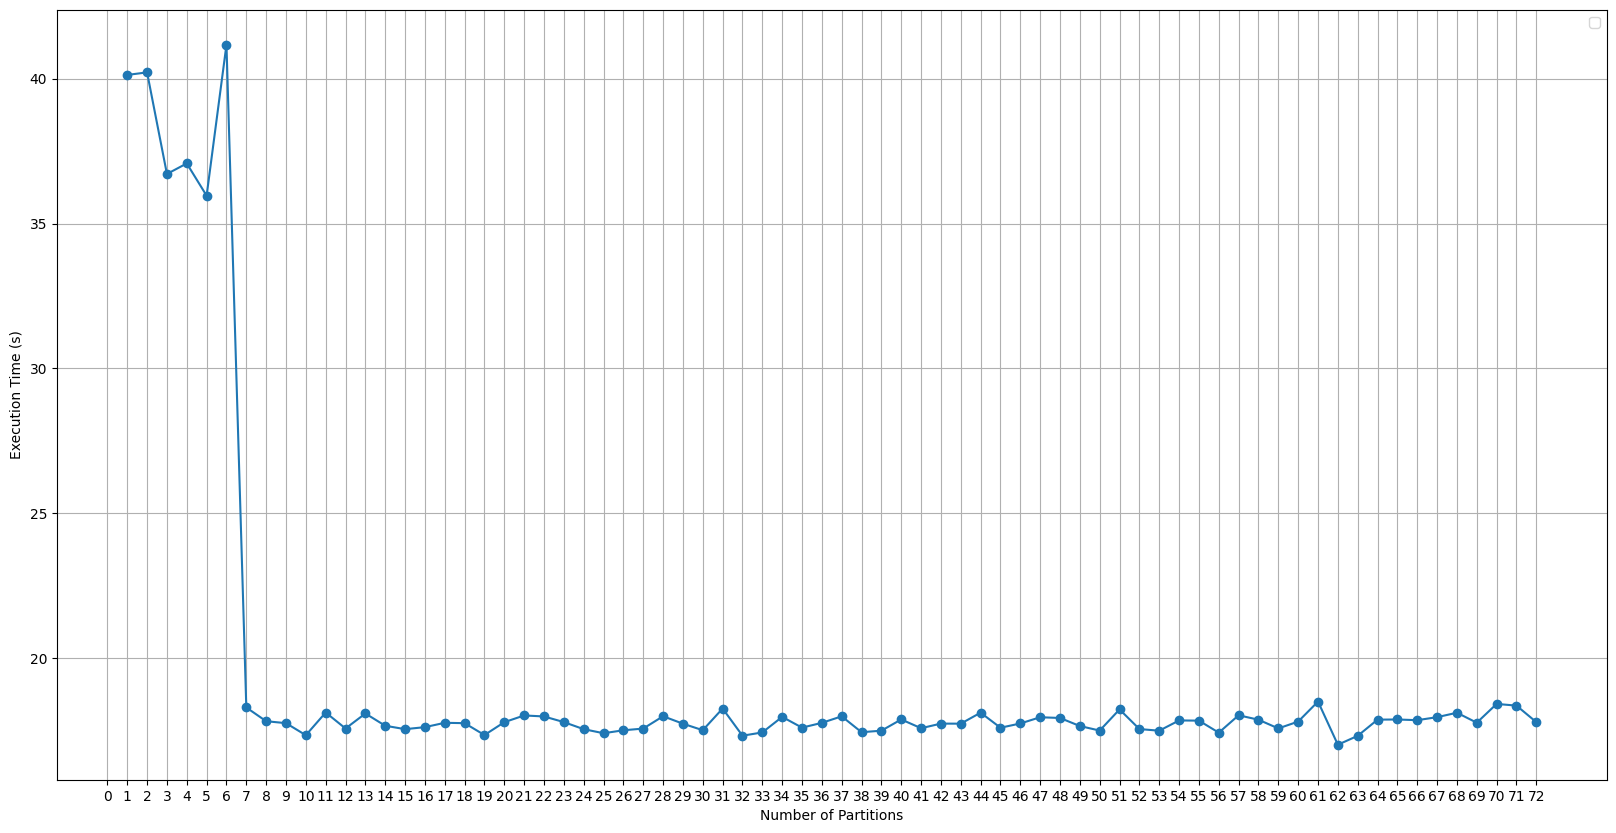

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Convert results to a Pandas DataFrame
results_df = pd.DataFrame(results, columns=['Number_of_Partitions', 'Execution_Time_seconds', 'Count'])
xticks = np.arange(0, 73)

plt.figure(figsize=(20, 10))
plt.plot(results_df['Number_of_Partitions'], results_df['Execution_Time_seconds'], marker='o')
plt.xlabel('Number of Partitions')
plt.ylabel('Execution Time (s)')
plt.grid(True)
plt.xticks(xticks)
plt.legend()
plt.show()

In [0]:
from pyspark.sql import SparkSession
import time
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("NYCTaxiDataPerformanceTest").getOrCreate()

# Load data into a DataFrame without caching
dfTaxi = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/raw/*.csv')

# Initialize a list to store the results
psg_count = []

# Function to measure execution time for different partition numbers
def measure_performance(num_partitions):
    # Repartition the DataFrame
    dfRepartitioned = dfTaxi.repartition(num_partitions)
    
    # Start time
    start_time = time.time()
    
    # Perform a simple transformation and action (e.g., count number of records with passenger_count > 0)
    count = dfRepartitioned.filter(dfRepartitioned.passenger_count > 5).count()    
    # End time
    end_time = time.time()
    
    # Execution time
    execution_time = end_time - start_time
    print(f"Number of Partitions: {num_partitions}, Execution Time: {execution_time:.2f} seconds, Count: {count}")
    psg_count.append((num_partitions, execution_time, count))
    
    # Unpersist the DataFrame to clear cache
    dfRepartitioned.unpersist()

# Experiment with different numbers of partitions
partition_numbers = [i for i in range(1, 73)]
for num_partitions in partition_numbers:
    measure_performance(num_partitions)



Number of Partitions: 1, Execution Time: 22.20 seconds, Count: 1607985
Number of Partitions: 2, Execution Time: 20.53 seconds, Count: 1607985
Number of Partitions: 3, Execution Time: 20.24 seconds, Count: 1607985
Number of Partitions: 4, Execution Time: 19.85 seconds, Count: 1607985
Number of Partitions: 5, Execution Time: 19.97 seconds, Count: 1607985
Number of Partitions: 6, Execution Time: 19.83 seconds, Count: 1607985
Number of Partitions: 7, Execution Time: 19.97 seconds, Count: 1607985
Number of Partitions: 8, Execution Time: 19.62 seconds, Count: 1607985
Number of Partitions: 9, Execution Time: 19.98 seconds, Count: 1607985
Number of Partitions: 10, Execution Time: 20.40 seconds, Count: 1607985
Number of Partitions: 11, Execution Time: 19.69 seconds, Count: 1607985
Number of Partitions: 12, Execution Time: 19.67 seconds, Count: 1607985
Number of Partitions: 13, Execution Time: 19.39 seconds, Count: 1607985
Number of Partitions: 14, Execution Time: 19.23 seconds, Count: 1607985
N

In [0]:
dfTaxi.describe('passenger_count').show()

+-------+------------------+
|summary|   passenger_count|
+-------+------------------+
|  count|          47248845|
|   mean|1.6670397339871483|
| stddev|1.3220922307333756|
|    min|                 0|
|    max|                 9|
+-------+------------------+



In [0]:
# Convert psg_count to a Pandas DataFrame
psg_count_df = pd.DataFrame(psg_count, columns=['Number_of_Partitions', 'Execution_Time_seconds', 'Count'])
psg_count_df = spark.createDataFrame(psg_count, schema=['Number_of_Partitions', 'Execution_Time_seconds', 'Count'])

# Save the psg_count to a CSV file
# Coalesce to a single partition and save to a single CSV file
psg_count_df.coalesce(1).write.format("csv").mode("overwrite").option("header", "true").save("/mnt/exectime/psg_count_4workers.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


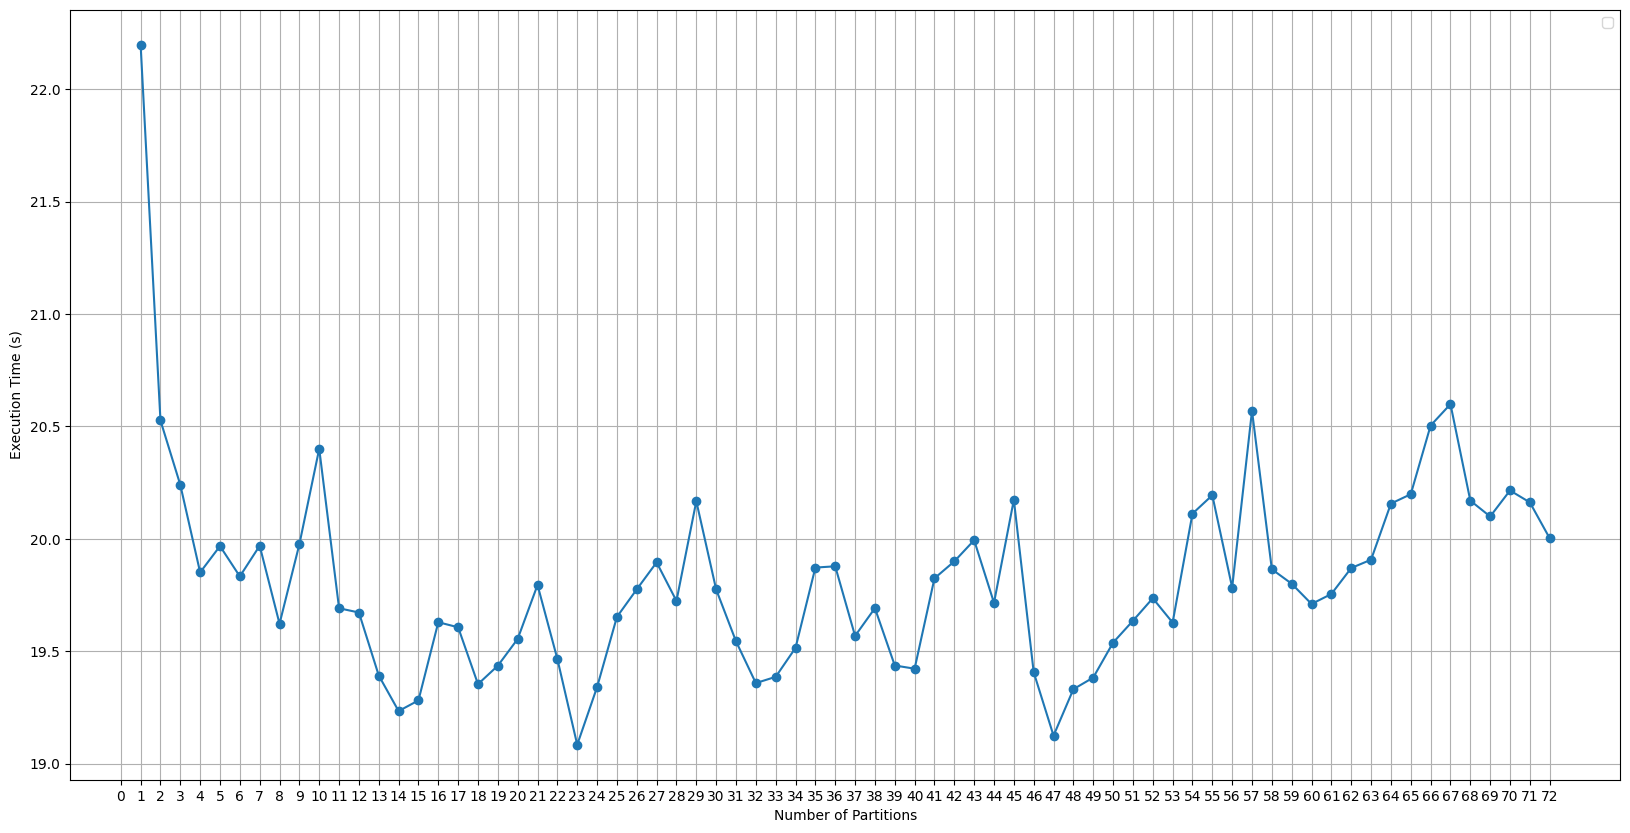

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Convert results to a Pandas DataFrame
psg_count_df = pd.DataFrame(psg_count, columns=['Number_of_Partitions', 'Execution_Time_seconds', 'Count'])
xticks = np.arange(0, 73)

plt.figure(figsize=(20, 10))
plt.plot(psg_count_df['Number_of_Partitions'], psg_count_df['Execution_Time_seconds'], marker='o')
plt.xlabel('Number of Partitions')
plt.ylabel('Execution Time (s)')
plt.grid(True)
plt.xticks(xticks)
plt.legend()
plt.show()

In [0]:
spark.sparkContext.getConf().getAll()

[('spark.databricks.preemption.enabled', 'true'),
 ('spark.databricks.clusterUsageTags.clusterFirstOnDemand', '1'),
 ('spark.sql.hive.metastore.jars', '/databricks/databricks-hive/*'),
 ('spark.driver.tempDirectory', '/local_disk0/tmp'),
 ('spark.sql.warehouse.dir', 'dbfs:/user/hive/warehouse'),
 ('spark.databricks.managedCatalog.clientClassName',
  'com.databricks.managedcatalog.ManagedCatalogClientImpl'),
 ('spark.databricks.credential.scope.fs.gs.auth.access.tokenProviderClassName',
  'com.databricks.backend.daemon.driver.credentials.CredentialScopeGCPTokenProvider'),
 ('spark.executor.memory', '7284m'),
 ('spark.databricks.clusterUsageTags.userProvidedSparkVersion',
  '14.3.x-scala2.12'),
 ('spark.hadoop.fs.fcfs-s3.impl.disable.cache', 'true'),
 ('spark.sql.streaming.checkpointFileManagerClass',
  'com.databricks.spark.sql.streaming.DatabricksCheckpointFileManager'),
 ('spark.databricks.service.dbutils.repl.backend',
  'com.databricks.dbconnect.ReplDBUtils'),
 ('spark.hadoop.databr

In [0]:
print(sc.getConf().get("spark.executor.instances"))

None


## Draft

In [0]:
# Use Data Frame API Operations to Filter Data

display(dfNYCTaxiData.select("tpep_pickup_datetime", "passenger_count", "total_amount").filter("passenger_count > 6 and total_amount > 50.0"))

In [0]:
display(dbutils.fs.ls("/mnt/raw"))

In [0]:
# Create Local Temp View

dfNYCTaxiData.createOrReplaceTempView('NYCTaxiDataTable')

In [0]:
%sql
--Use SQL to count NYC Taxi Data records

select count(*) from NYCTaxiDataTable

In [0]:
display(dfNYCTaxiData.select("tpep_pickup_datetime", "passenger_count", "total_amount").filter("passenger_count > 5"))

In [0]:
%sql
-- Use SQL to filter NYC Taxi Data records

select cast(tpep_pickup_datetime as date) as pickup_date
  , tpep_dropoff_datetime
  , passenger_count
  , total_amount
from NYCTaxiDataTable
where cast(tpep_pickup_datetime as date) = '2016-01-02'
  and passenger_count > 5

In [0]:
%sql
-- Use SQL to aggregate NYC Taxi Data records and visualize data
select case payment_type
            when 1 then 'Credit card'
            when 2 then 'Cash'
            when 3 then 'No charge'
            when 4 then 'Dispute'
            when 5 then 'Unknown'
            when 6 then 'Voided trip'
        end as PaymentType
  , count(*) as TotalRideCount
from NYCTaxiDataTable
group by payment_type
order by TotalRideCount desc
